<h1>Imports</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('Datasets\\dengue.csv')

In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1>Change category</h1>

In [4]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


In [6]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Insights</h1>

<h1>Insight No.1</h1>
<p>Region IV-A recorded the highest number of dengue cases, indicating a significant concentration of infections in the area. </p>

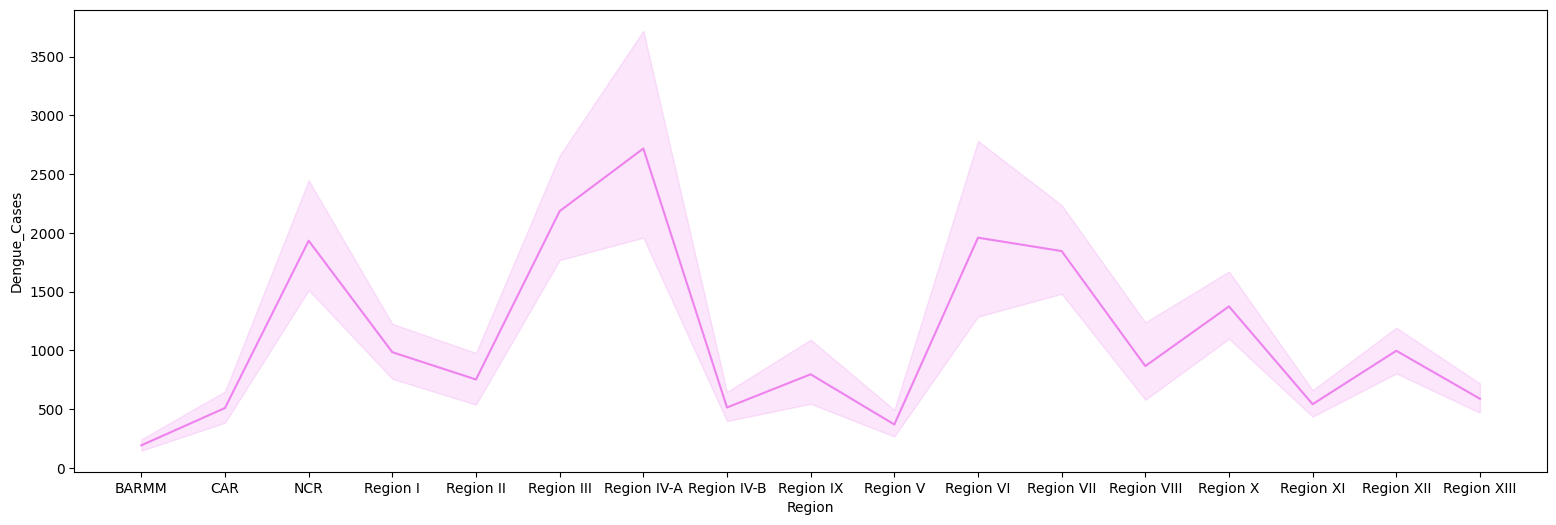

In [7]:
sns.lineplot(data = dengue, y = "Dengue_Cases", x = "Region", color='violet')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No.2</h1>
<p>The highest number of recorded dengue deaths occurred in the months of September and October, highlighting a notable surge during this period. </p>

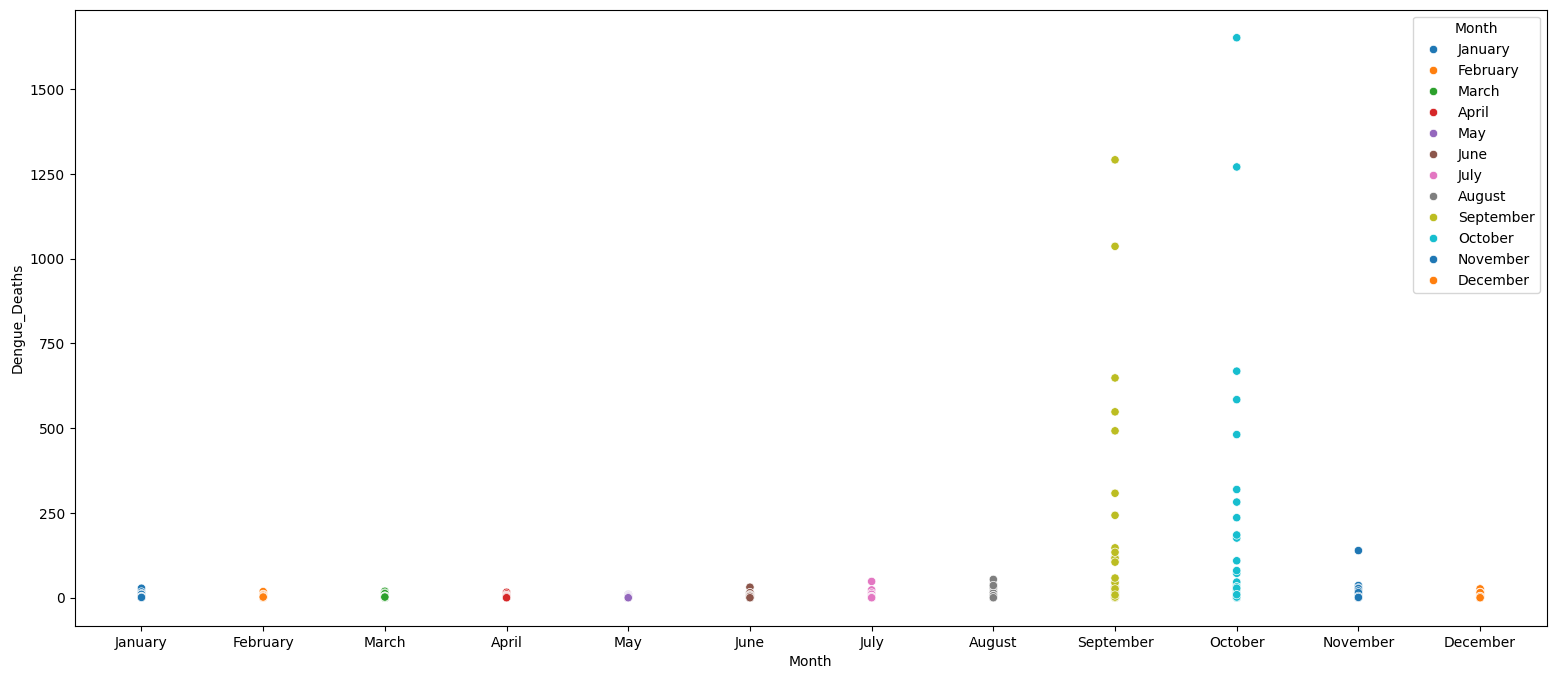

In [8]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dengue["Month"] = pd.Categorical(dengue["Month"], categories=month_order, ordered=True)

sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Month", hue="Month", palette="tab10")
plt.gcf().set_size_inches(19, 8)
plt.show()

<h1>Insight No.3</h1>
<p>The National Capital Region (NCR) recorded the highest number of dengue-related deaths, indicating a significant concentration of cases in the area. In contrast, the lowest numbers of dengue deaths were observed in Regions I to IV-B, suggesting relatively lower impact in those regions.</p>

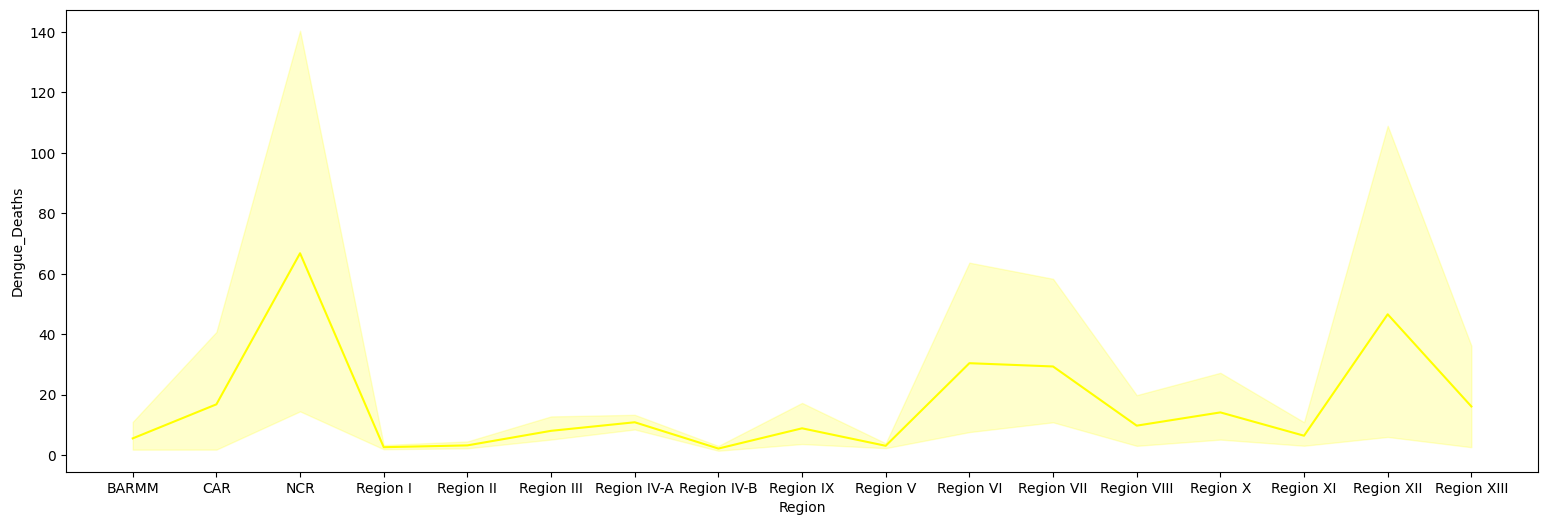

In [9]:
sns.lineplot(data=dengue, x="Region", y="Dengue_Deaths", color='yellow')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 4</h1>
<p>In 2019, there was a significant surge in cases from June to September, peaking sharply in September with the highest recorded figure across all years. This indicates that 2019 experienced an unusual spike, possibly due to a major event or outbreak during that period. In contrast, 2020 showed consistently low numbers throughout the year, likely reflecting the impact of restrictions or preventive measures implemented due to the COVID-19 pandemic. The steady increase observed in 2018 suggests a gradual buildup rather than a sudden outbreak, while 2016 and 2017 followed a relatively moderate trend.</p>

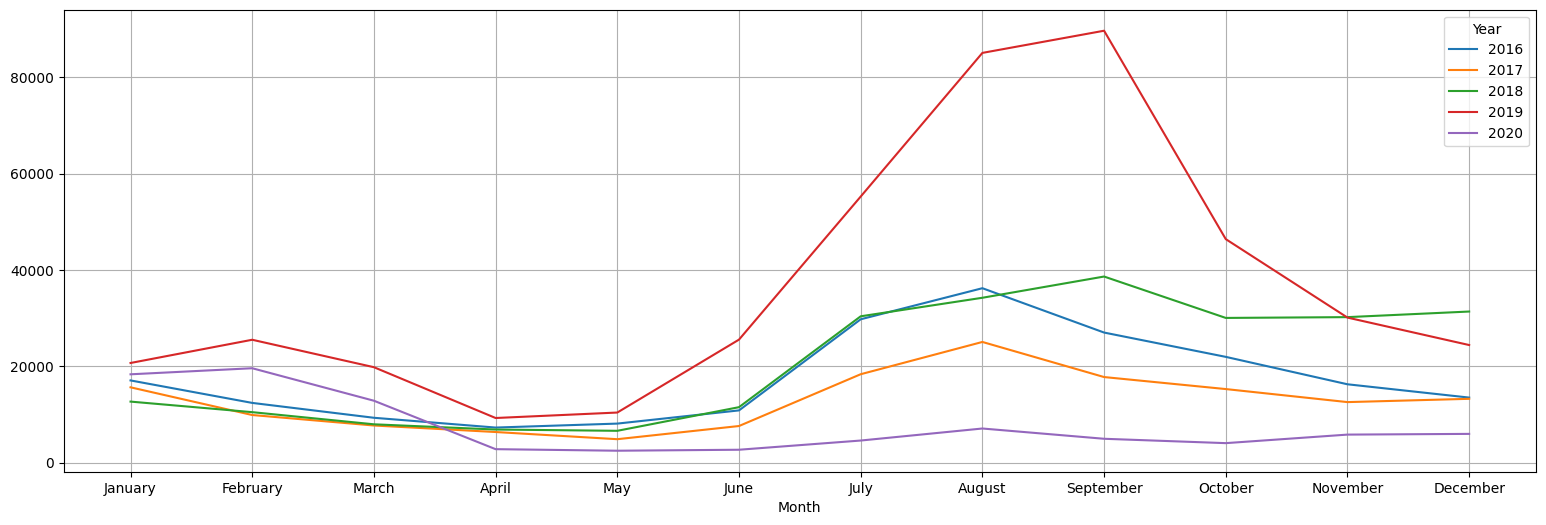

In [10]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(19,6)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1>Insight No. 5</h1>
<p>The months of July to September recorded the highest combined totals across all years, with August showing the peak. A significant contributor to this surge is the red segment (2019), which shows an exceptional increase compared to other years. This suggests that 2019 experienced a major spike in reported values during the rainy season, possibly due to increased exposure or transmission factors during that period. Conversely, 2020 (purple segment) maintained consistently lower values, likely influenced by the COVID-19 pandemic’s effects such as lockdowns and enhanced health protocols, which may have indirectly reduced reported cases or mobility-related exposures.</p>

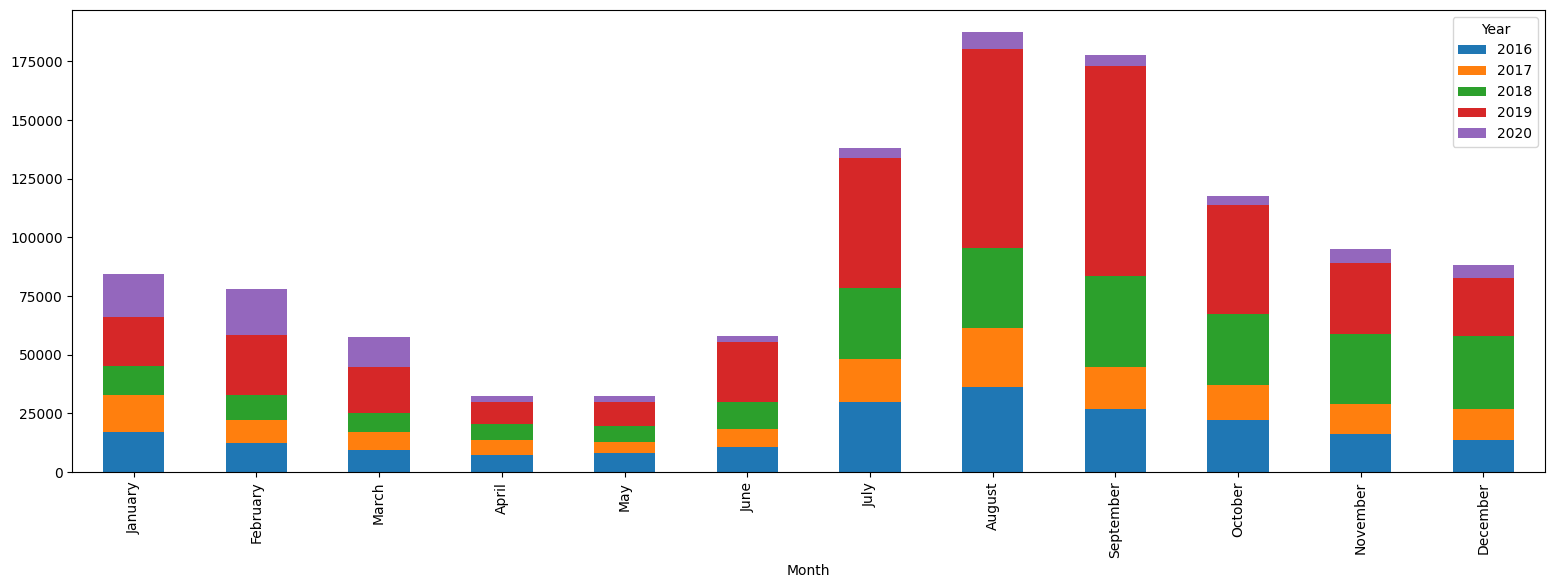

In [11]:
monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(19,6)
plt.show()

<h1>Insight No. 6</h1>
<p>The data reveals that dengue cases start rising in June, sharply increasing in July and peaking in August, followed closely by September. These months coincide with the wet season, which creates favorable breeding conditions for mosquitoes. The lowest number of cases is observed from April to May, indicating a period of reduced transmission. Interestingly, cases remain relatively high even in October and November, suggesting that post-rainy season conditions still support dengue spread. This pattern highlights the need for sustained vector control efforts not only before but also after the peak months to effectively manage outbreaks.</p>

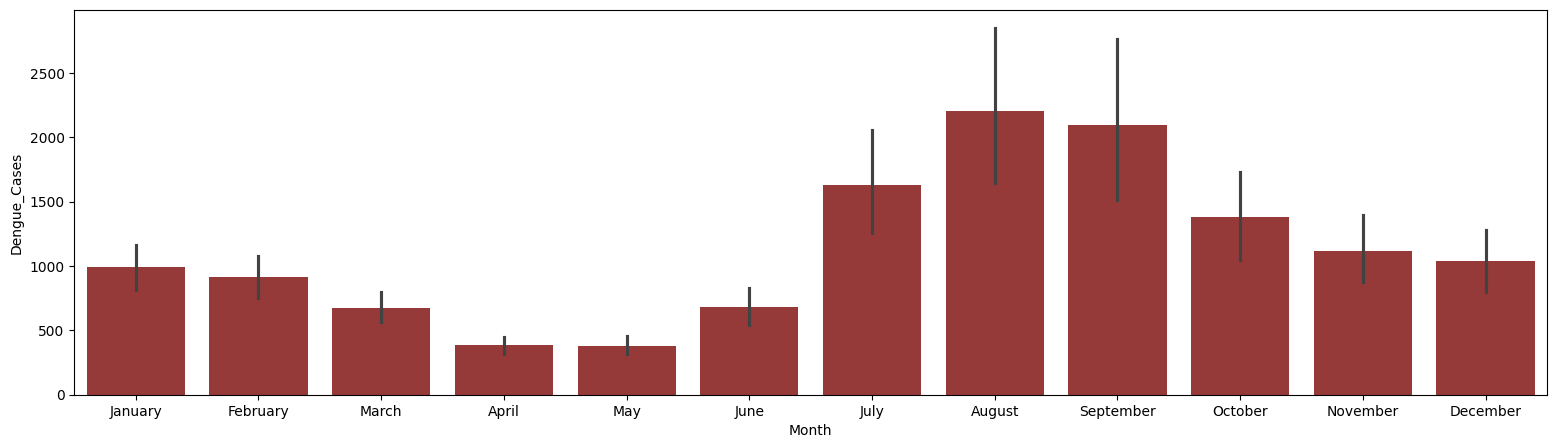

In [12]:
sns.barplot(data = dengue, x = "Month", y = "Dengue_Cases", color = "brown" )
plt.gcf().set_size_inches(19, 5) 
plt.show()

<h1>Insight No. 7</h1>
<p>The data indicates a sharp spike in dengue-related deaths in 2016 and 2017, especially during September and October, with 2016 reaching the highest number of fatalities across all years. These peak months reflect the deadliest period for dengue during those years, possibly due to overwhelmed healthcare systems or delayed interventions. In contrast, 2018 to 2020 show significantly fewer deaths, maintaining a more stable and lower trend, suggesting improved medical responses, awareness, or preventive measures in recent years. This trend highlights the importance of proactive healthcare strategies and early interventions, especially in the months leading to the dengue season's peak.</p>

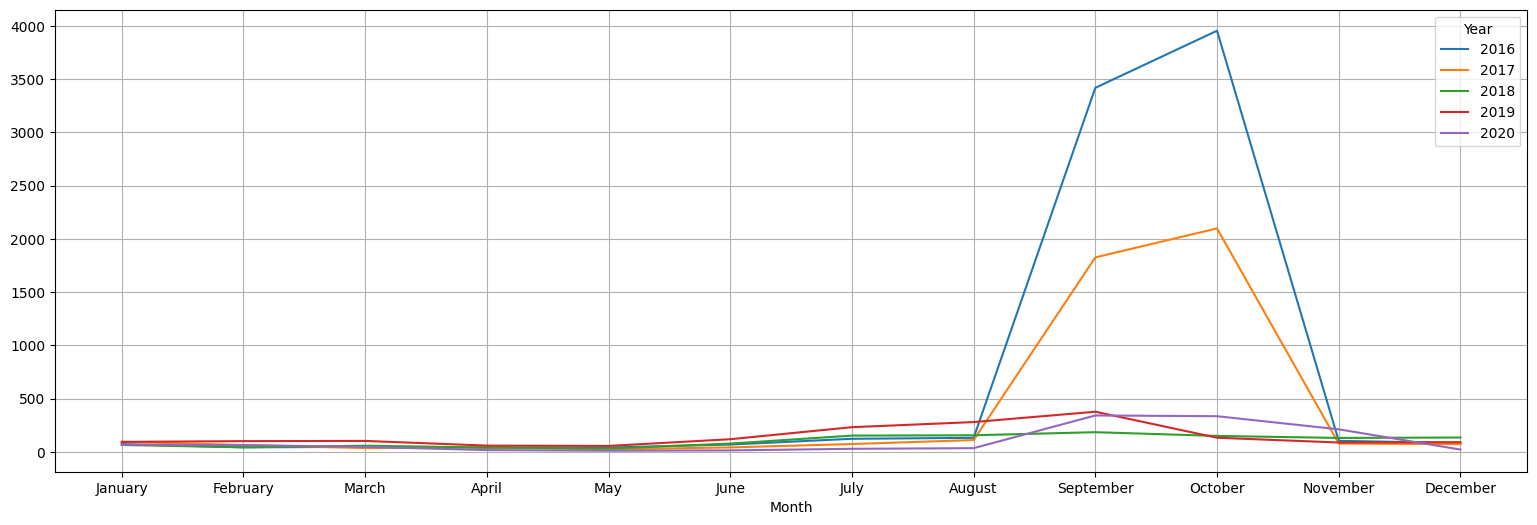

In [13]:

month_order_2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories = month_order_2, ordered = True)

monthly_cases_2 = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Deaths"].sum()

monthly_cases_2.unstack().plot(kind='line')
plt.gcf().set_size_inches(19,6)
plt.grid(True)
plt.xticks(range(0,12), month_order_2)
plt.show()


<h1>Insight No. 8</h1>
<p>The lowest number of dengue cases was recorded in the Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) and Region V (Bicol Region), indicating that these areas experienced a relatively lower incidence rate of dengue infections throughout the observed period.</p>

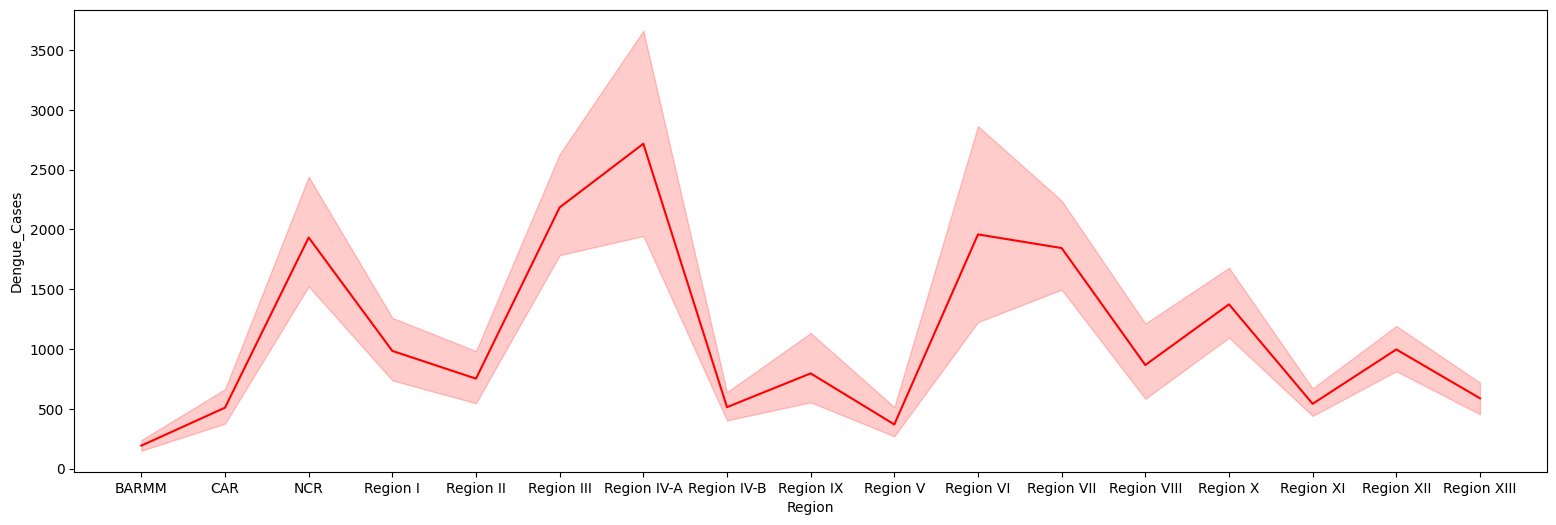

In [14]:
sns.lineplot(data = dengue, y = "Dengue_Cases", x = "Region", color='red')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 9</h1>
<p>The month of May recorded the lowest number of dengue-related deaths, indicating a relatively minimal impact during this period across all observed years. This suggests that either fewer severe cases were reported, or that early interventions and environmental factors during this time may have played a role in reducing the fatality rate.</p>

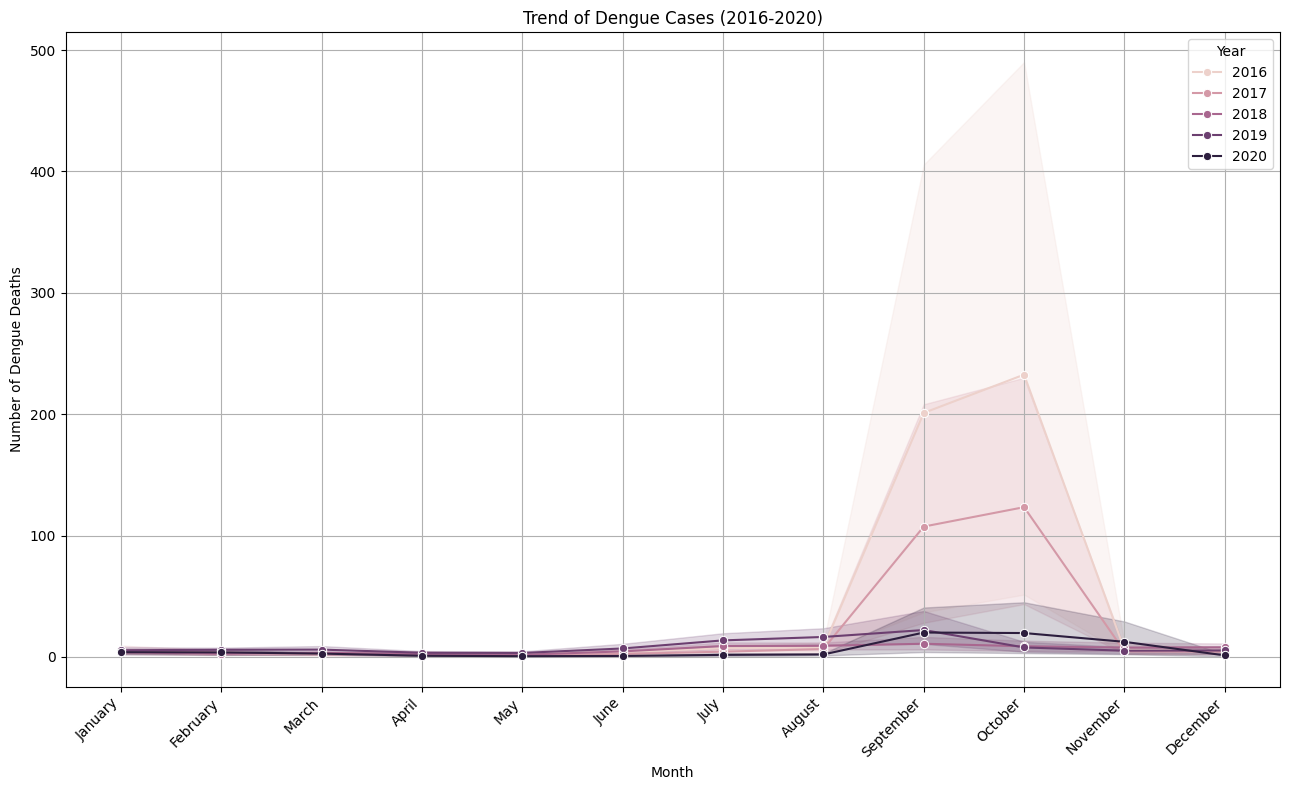

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=dengue, x='Month', y='Dengue_Deaths', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Deaths')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight No. 10</h1>
<p>The scatter plot shows that higher dengue cases don’t always lead to more deaths. Many areas with high case counts had low deaths, suggesting effective healthcare. However, some lower-case regions had high deaths, possibly due to limited medical access or delayed treatment.</p>

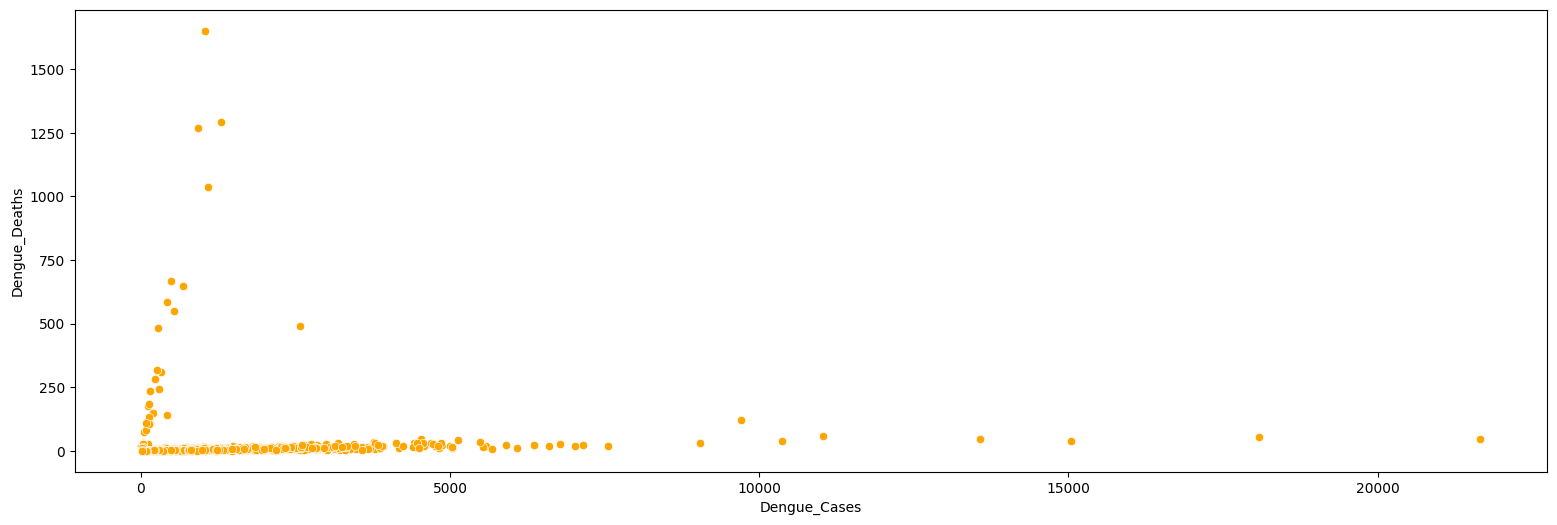

In [16]:
sns.scatterplot(data = dengue, y="Dengue_Deaths", x="Dengue_Cases", color = 'orange')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Try</h1>

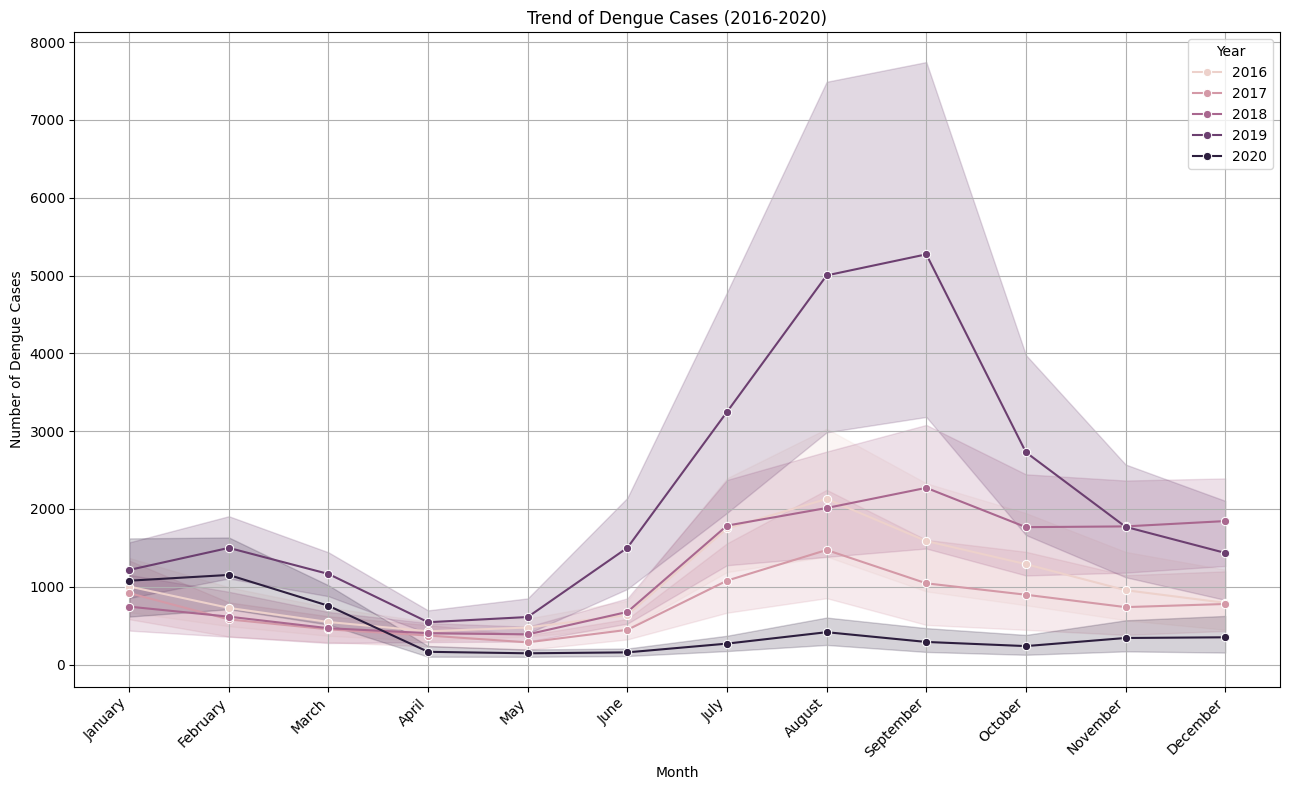

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>REGION INSIGHTS</h1>

<h1>Insight No. 11</h1>
<p>The month of July recorded the highest number of dengue cases in BARMM, peaking significantly compared to other months. This spike suggests a seasonal trend, potentially influenced by the rainy season, which creates favorable breeding conditions for mosquitoes. In contrast, April reported the lowest number of cases, indicating a possible window of lower transmission risk. The sharp increase from May to July underscores the need for intensified vector control and public awareness campaigns ahead of the mid-year months to mitigate the outbreak.</p>

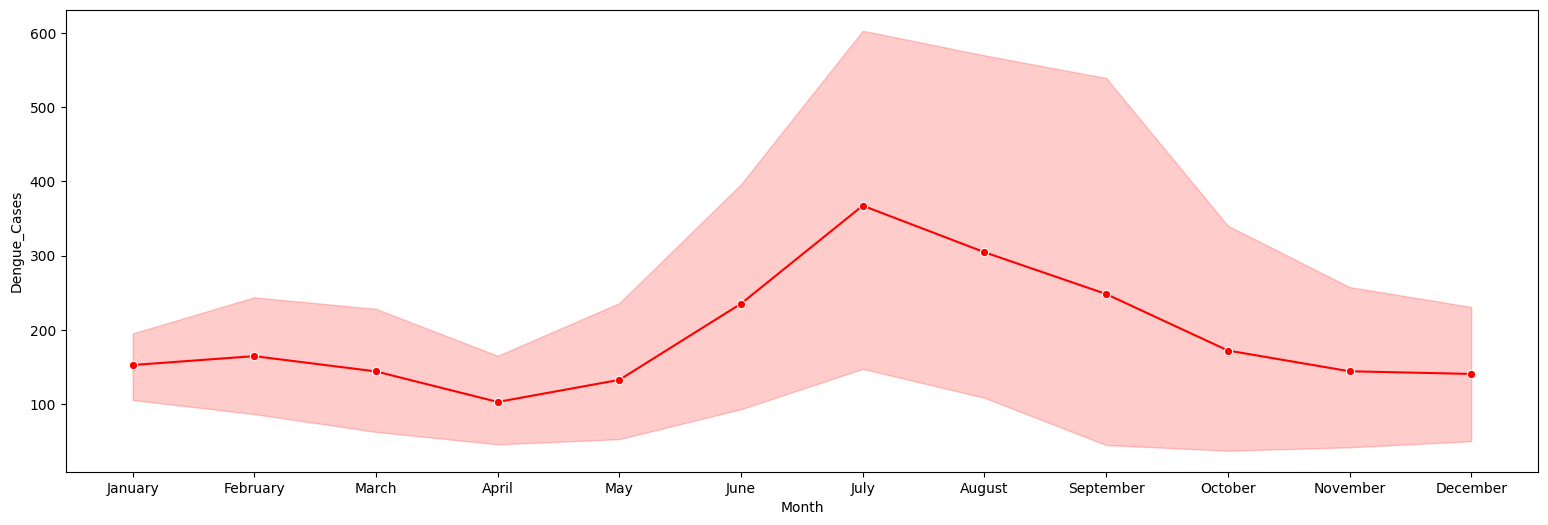

In [73]:
BARMM = dengue[dengue['Region'] == 'BARMM']
sns.lineplot(data=BARMM, x='Month', y='Dengue_Cases', marker='o', color='red')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 12</h1>
<P>Region CAR experienced a dramatic increase in dengue cases starting June, reaching a peak in July and maintaining similarly high numbers through August. This mid-year spike strongly suggests a seasonal trend, likely influenced by the rainy season which promotes mosquito breeding. In contrast, April had the lowest recorded cases, indicating a relatively low-risk period. The sustained high case count in both July and August highlights the need for intensified health interventions and public awareness campaigns prior to this period to mitigate the impact of dengue outbreaks.</P>

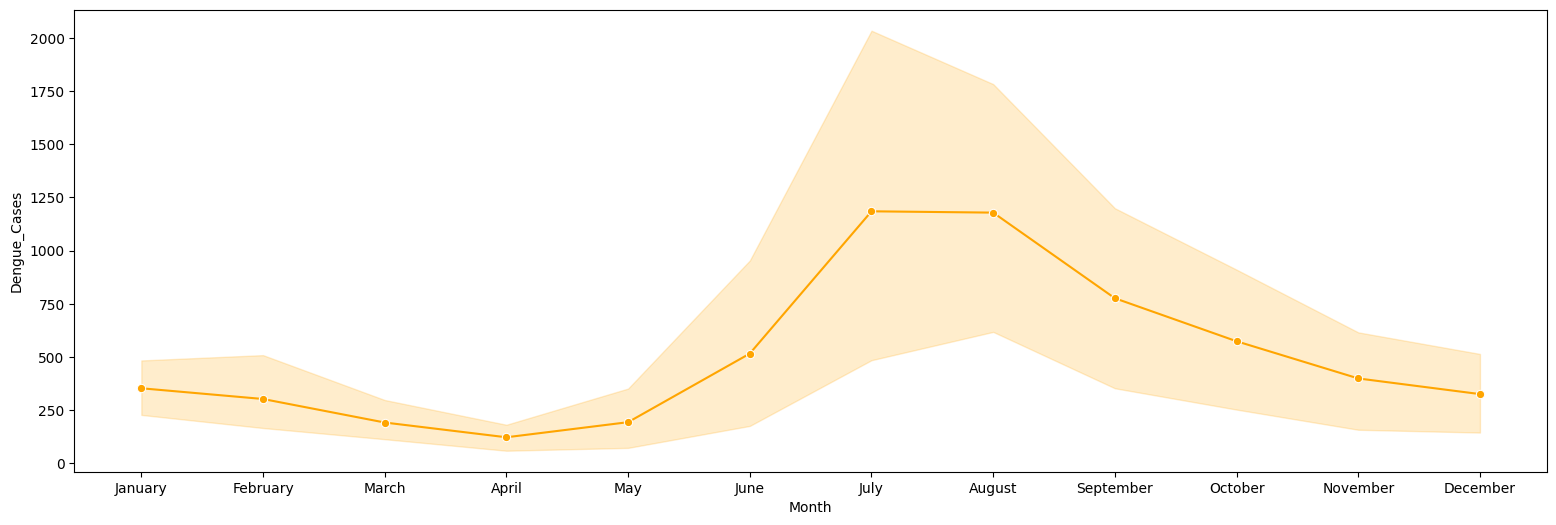

In [74]:
CAR = dengue[dengue['Region'] == 'CAR']
sns.lineplot(data = CAR, x='Month', y='Dengue_Cases', marker='o', color='orange')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 13</h1>
<p>Region I saw a steep rise in dengue cases starting in June, with a sharp peak in August, making it the month with the highest recorded cases. This surge aligns with the rainy season, suggesting a seasonal pattern in mosquito population growth. The early months of the year—from January to May—show consistently low dengue activity, with April marking the lowest point. The sustained high numbers from July to September emphasize the urgency of preventive measures and public health campaigns before and during this critical period to reduce the outbreak's impact.</p>

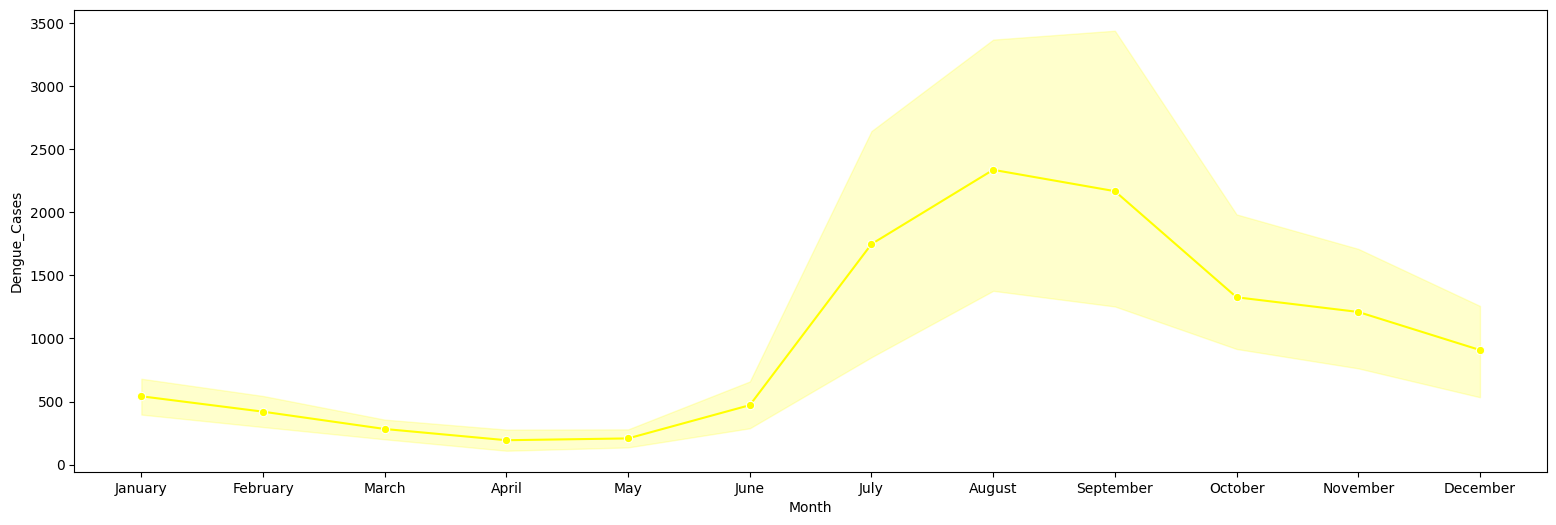

In [75]:
regionI = dengue[dengue['Region'] == 'Region I']
sns.lineplot(data=regionI, x='Month', y='Dengue_Cases', marker='o', color='yellow')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 14</h1>
<p>The month of April recorded the lowest number of dengue cases, suggesting a seasonal dip in transmission during this period. This decline may be attributed to environmental factors such as reduced rainfall or lower mosquito breeding conditions. Conversely, the sharp increase beginning in June and peaking in September highlights a critical window for intensified public health interventions, especially vector control and community awareness campaigns, to mitigate the annual surge in cases.</p>

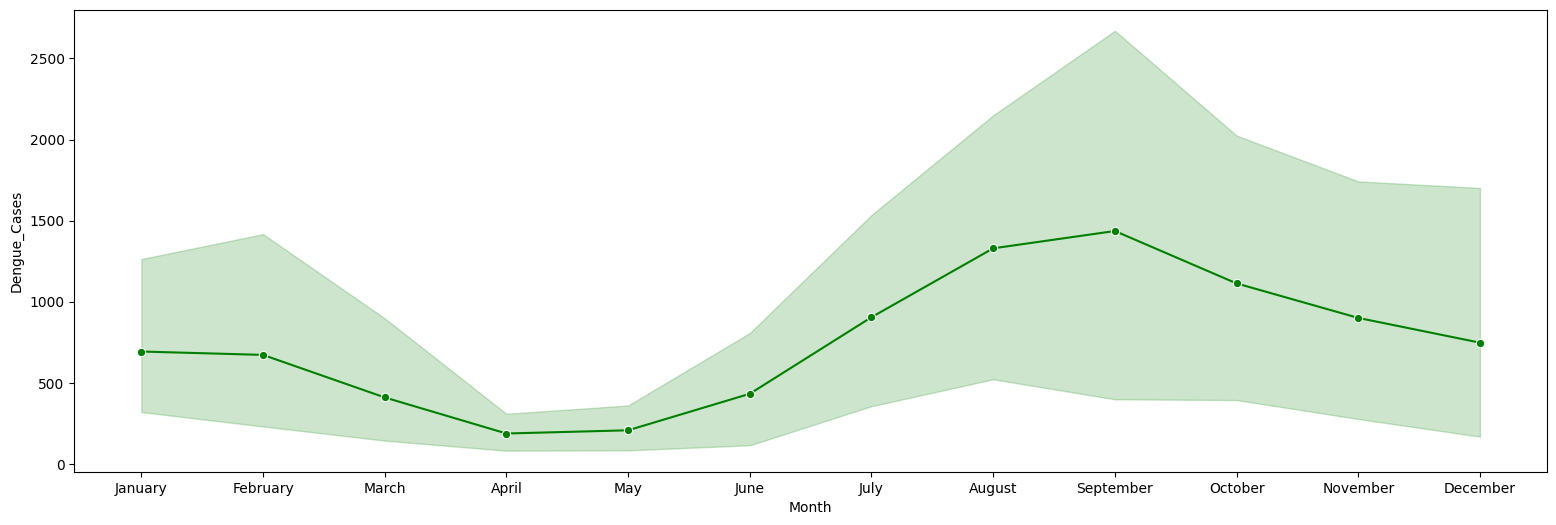

In [76]:
regionII = dengue[dengue['Region'] == 'Region II']
sns.lineplot(data=regionII, x='Month', y='Dengue_Cases', marker='o', color='green')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 15</h1>
<p>Dengue cases in Region III showed a notable surge beginning in June and peaking in September, with September recording the highest number of cases throughout the year. This trend underscores the heightened risk during the rainy season, which typically creates more breeding grounds for mosquitoes. In contrast, the months of April and May saw the lowest case numbers, indicating a seasonal low point in transmission. These patterns highlight the importance of preemptive vector control and community education efforts starting in late spring to curb the dramatic mid-year escalation.</p>

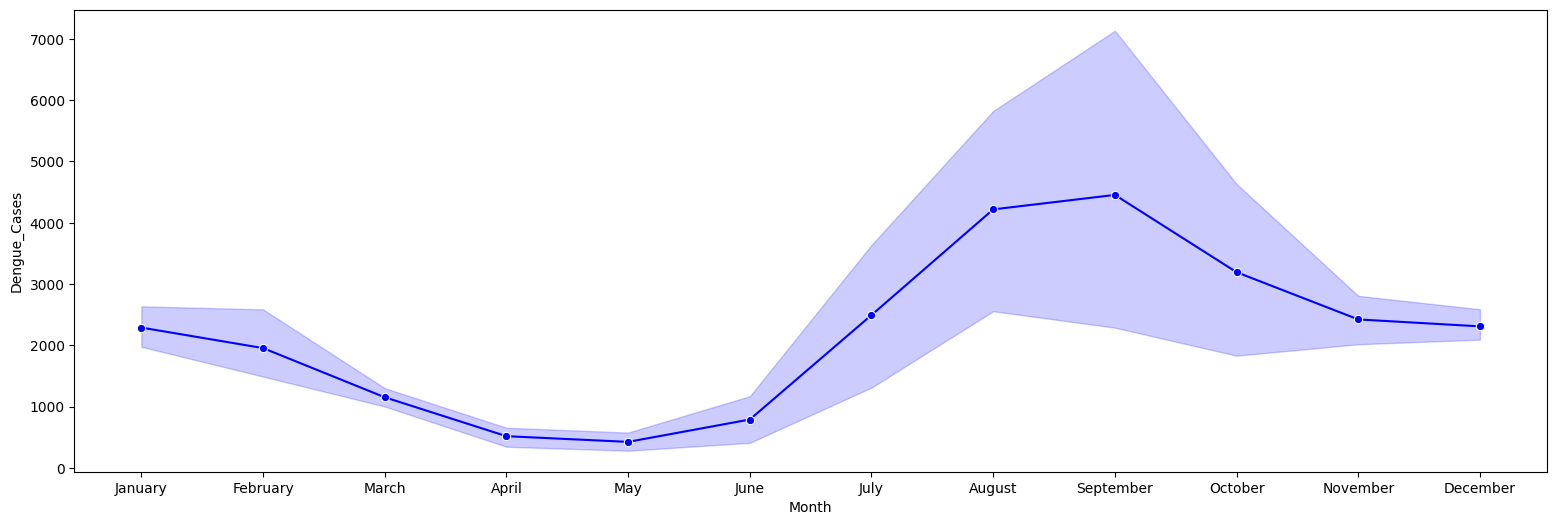

In [77]:
regionIII = dengue[dengue['Region'] == 'Region III']
sns.lineplot(data = regionIII, x='Month', y='Dengue_Cases', marker='o', color='blue')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 16</h1>
<p>Region IV-A experienced a dramatic increase in dengue cases starting from June, with a sharp peak in September — the highest among all months — suggesting intense seasonal vulnerability during the late rainy season. The lowest number of cases was recorded in May, indicating a period of relative stability before the outbreak season begins. This pattern underscores the critical need for early surveillance and vector control strategies by late spring to prevent the exponential rise observed in the third quarter of the year.</p>

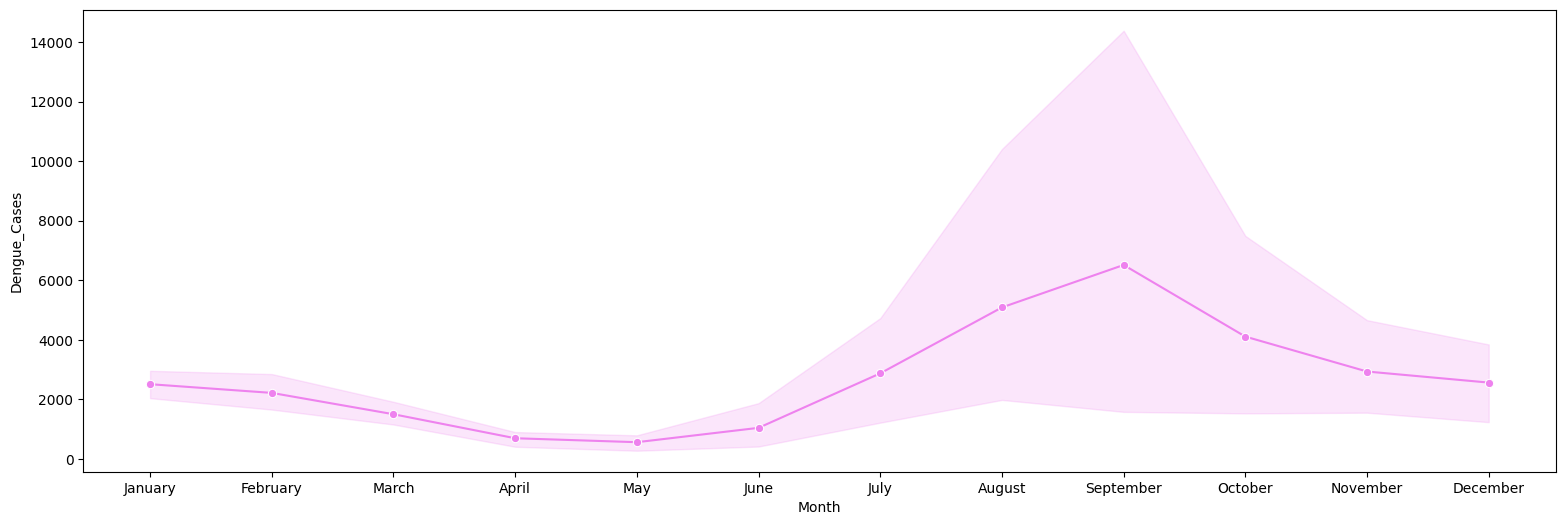

In [79]:
regionIV_A = dengue[dengue['Region'] == 'Region IV-A']
sns.lineplot(data = regionIV_A, x='Month', y='Dengue_Cases', marker='o', color='violet')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No. 17</h1>
<p>Region IV-B saw its highest number of dengue cases in August, marking the peak of transmission activity. This surge began in June and sharply increased through July, highlighting a mid-year seasonal pattern likely influenced by the rainy season. The lowest case count occurred in May, indicating a relatively calm period before the spike. These trends emphasize the importance of implementing proactive public health measures, such as mosquito control and awareness campaigns, ahead of the rainy season to curb the rapid rise in cases observed during the third quarter.</p>

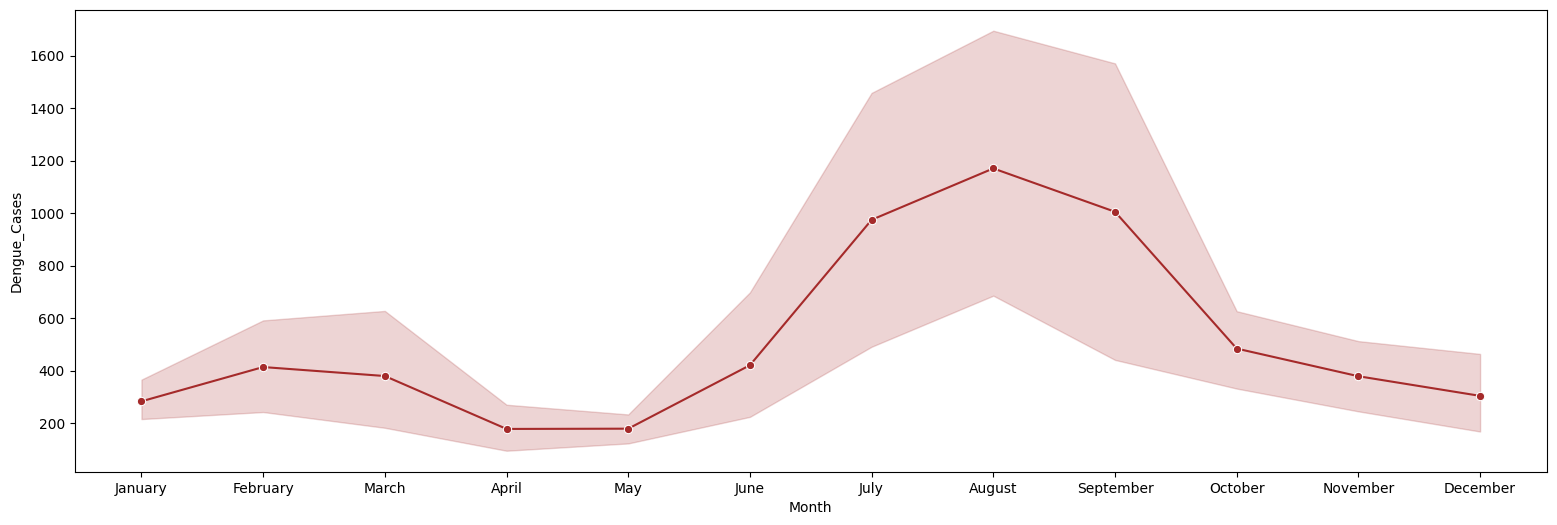

In [80]:
regionIV_B  = dengue[dengue['Region'] == 'Region IV-B']
sns.lineplot(data = regionIV_B, x='Month', y='Dengue_Cases', marker='o', color='brown')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Try</h1>

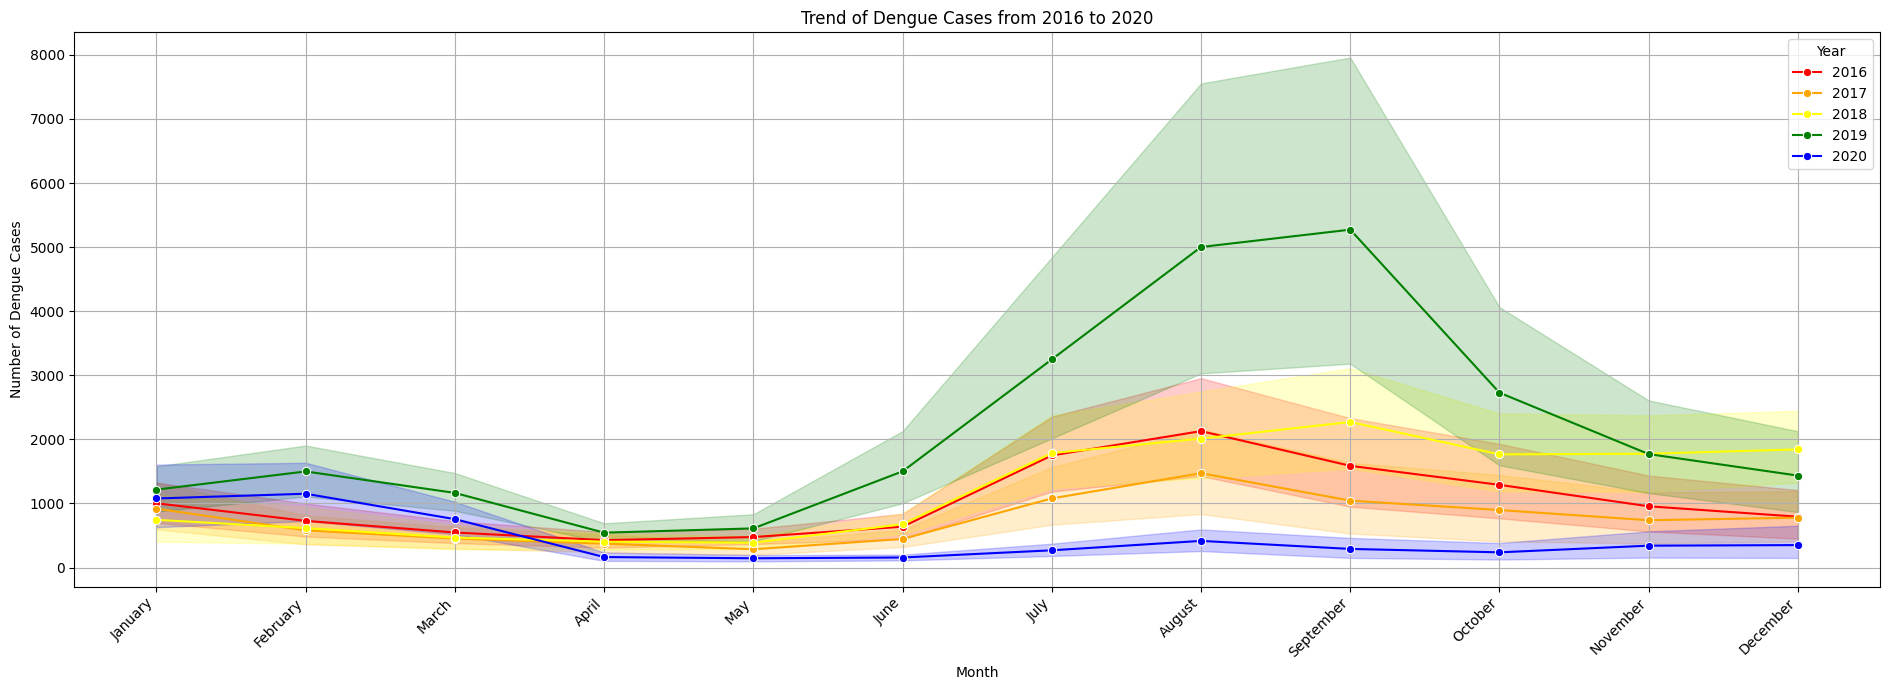

In [81]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Set month order once
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Plot each year with a label for the legend
dengue_2016 = dengue[dengue['Year'] == 2016]
sns.lineplot(data=dengue_2016, x='Month', y='Dengue_Cases', marker='o', color='red', label='2016')

dengue_2017 = dengue[dengue['Year'] == 2017]
sns.lineplot(data=dengue_2017, x='Month', y='Dengue_Cases', marker='o', color='orange', label='2017')

dengue_2018 = dengue[dengue['Year'] == 2018]
sns.lineplot(data=dengue_2018, x='Month', y='Dengue_Cases', marker='o', color='yellow', label='2018')

dengue_2019 = dengue[dengue['Year'] == 2019]
sns.lineplot(data=dengue_2019, x='Month', y='Dengue_Cases', marker='o', color='green', label='2019')

dengue_2020 = dengue[dengue['Year'] == 2020]
sns.lineplot(data=dengue_2020, x='Month', y='Dengue_Cases', marker='o', color='blue', label='2020')

# Plot settings
plt.gcf().set_size_inches(19, 7)
plt.title('Trend of Dengue Cases from 2016 to 2020')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.legend(title='Year')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>OTHER REGION INSIGHTS</h1>

<h1>Insight No.18</h1>
<p>"Region IX exhibited a significant spike in dengue cases during July, marking the highest incidence across the year. This sharp increase followed a steady climb beginning in May, emphasizing the onset of the dengue season in early to mid-year. The lowest number of cases was observed in April, a calm period before the outbreak intensified. The pattern suggests that July is the most critical month for dengue interventions, and that strategic planning and control efforts should be ramped up starting in May to curb the escalating trend.</p>

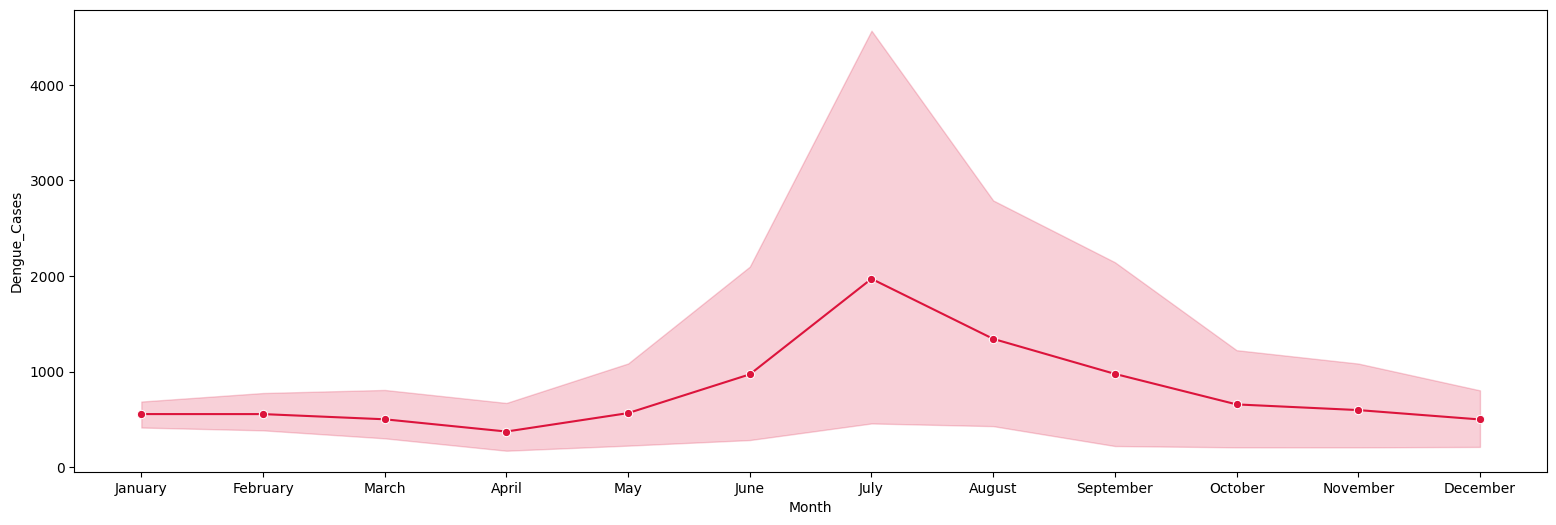

In [102]:
regionIX  = dengue[dengue['Region'] == 'Region IX']
sns.lineplot(data = regionIX, x='Month', y='Dengue_Cases', marker='o', color='crimson')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No.19</h1>
<p>Dengue cases in Region V were at their lowest in May, followed by a steady increase starting in June and peaking in September. This pattern indicates that the third quarter of the year, especially August and September, is the most vulnerable period for dengue outbreaks in the region. The consistent rise post-May suggests that early preparation, especially in June, is crucial for mitigating the peak. The sharp drop in October reflects the seasonal nature of transmission, likely tied to environmental changes such as rainfall and temperature.</p>

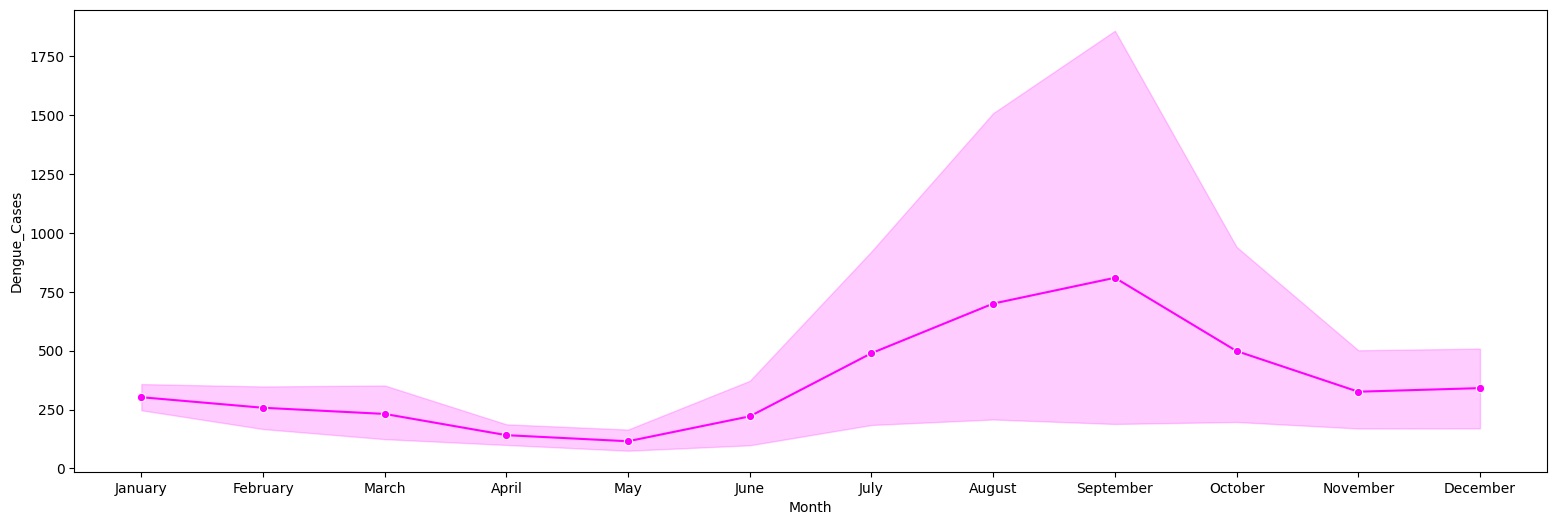

In [93]:
regionV  = dengue[dengue['Region'] == 'Region V']
sns.lineplot(data = regionV, x='Month', y='Dengue_Cases', marker='o', color='magenta')
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Insight No.20</h1>
<p>Dengue cases in Region VI begin to rise significantly from June, with a sharp surge in July and peaking in August. This trend mirrors the common seasonal spike seen in other regions. The high point in August is followed by a rapid decline, suggesting a short but intense dengue season. The early signs of increase from May to June provide a clear window for preventive measures before the peak in August.</p>

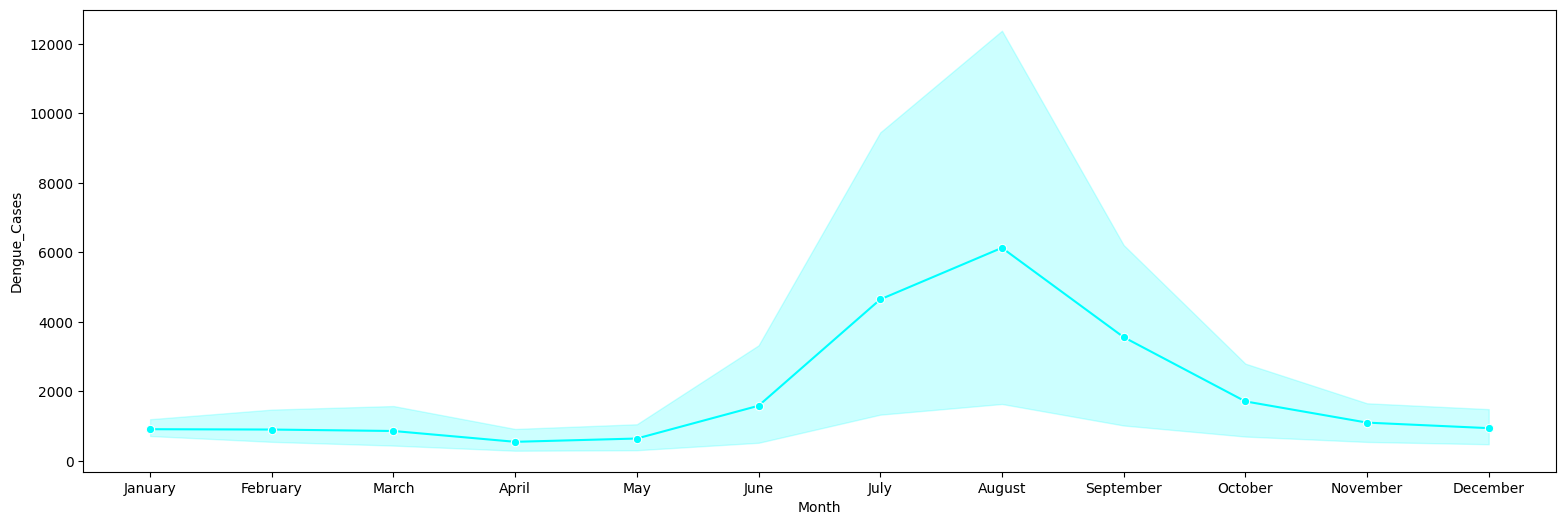

In [94]:
regionVI  = dengue[dengue['Region'] == 'Region VI']
sns.lineplot(data = regionVI, x='Month', y='Dengue_Cases', marker='o', color='cyan')
plt.gcf().set_size_inches(19, 6)
plt.show()

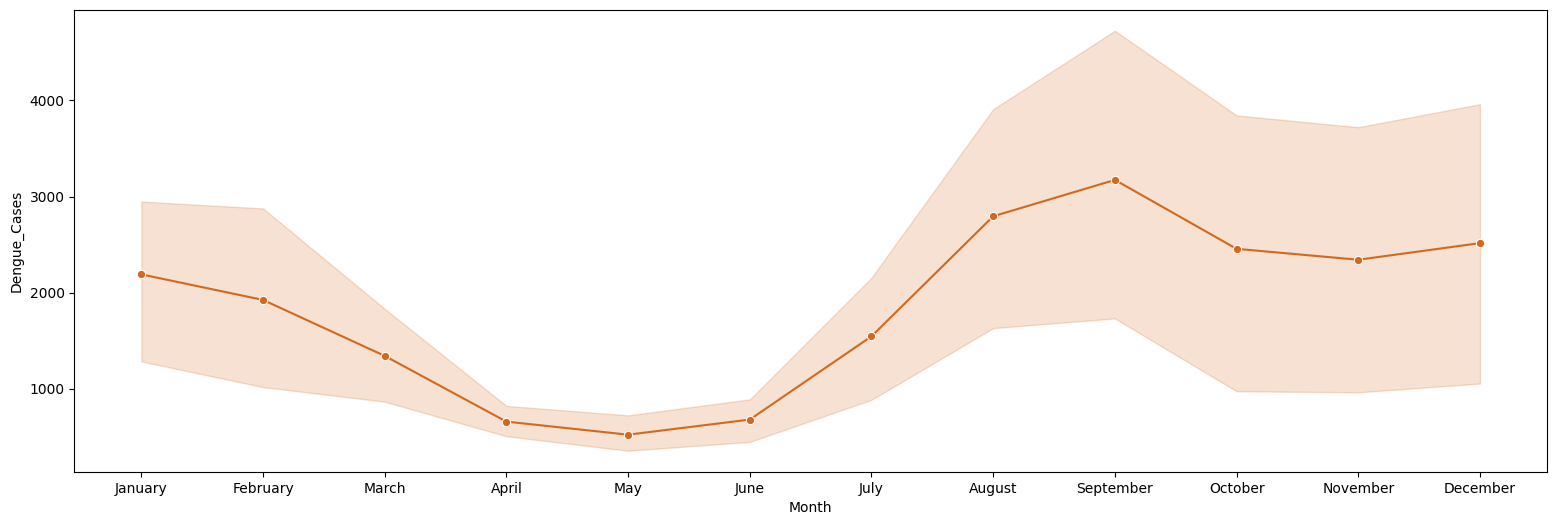

In [95]:
regionVII  = dengue[dengue['Region'] == 'Region VII']
sns.lineplot(data = regionVII, x='Month', y='Dengue_Cases', marker='o', color='chocolate')
plt.gcf().set_size_inches(19, 6)
plt.show()

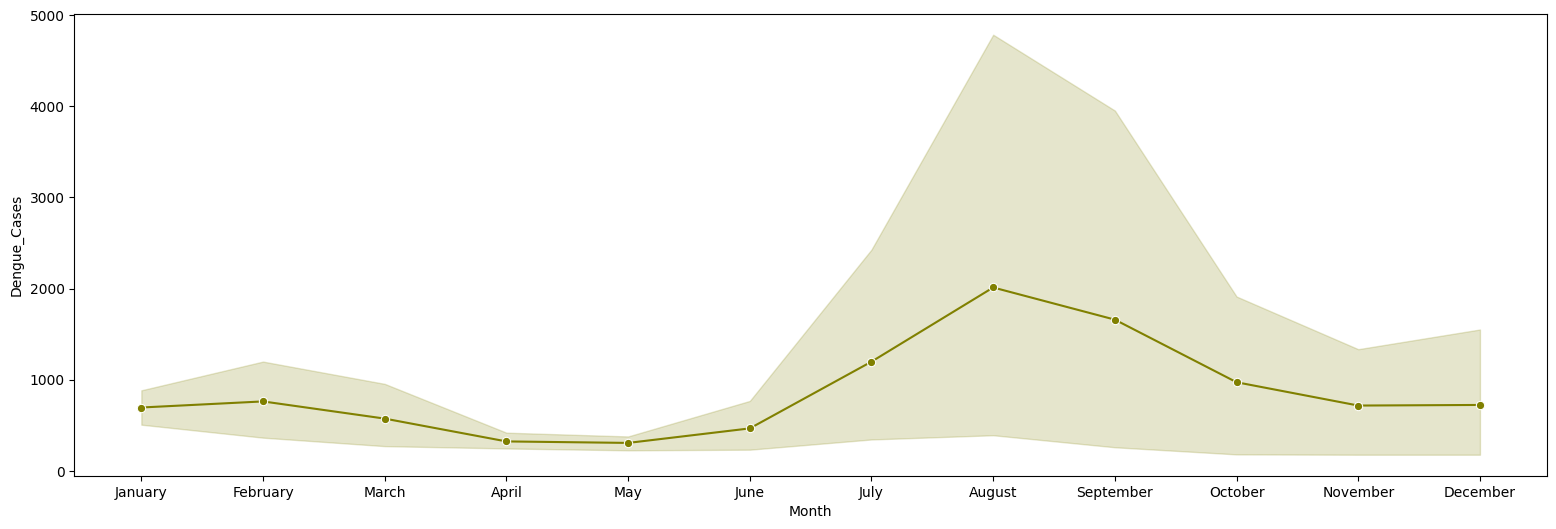

In [96]:
regionVIII  = dengue[dengue['Region'] == 'Region VIII']
sns.lineplot(data = regionVIII, x='Month', y='Dengue_Cases', marker='o', color='olive')
plt.gcf().set_size_inches(19, 6)
plt.show()

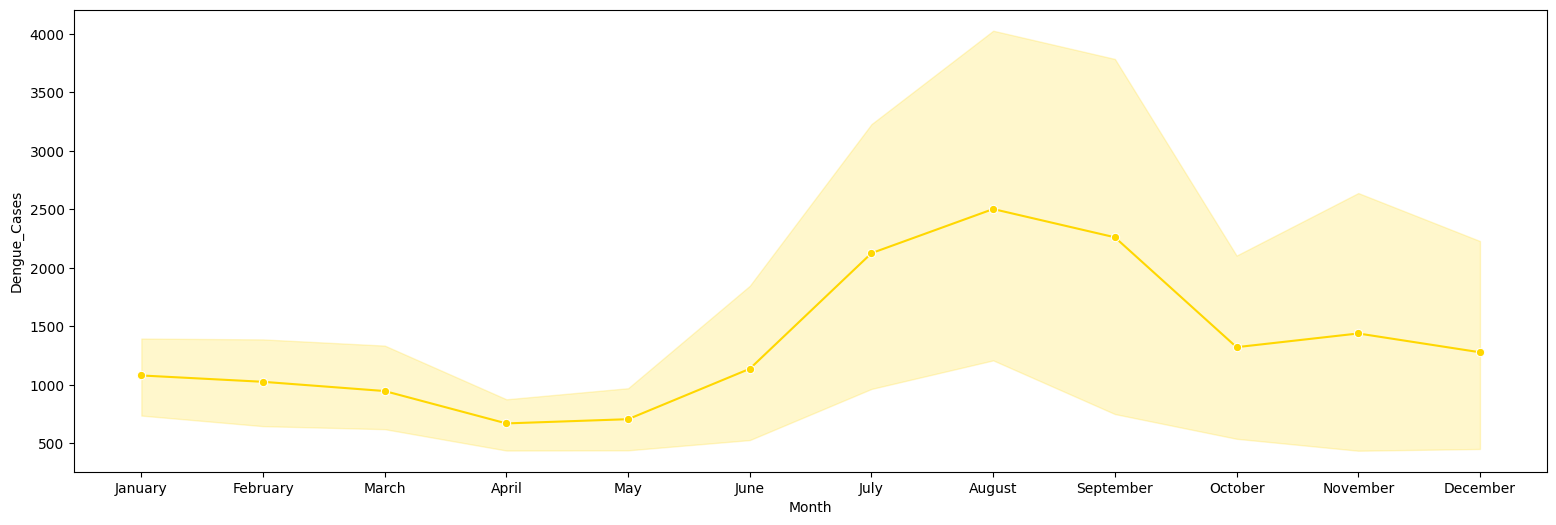

In [97]:
regionX  = dengue[dengue['Region'] == 'Region X']
sns.lineplot(data = regionX, x='Month', y='Dengue_Cases', marker='o', color='gold')
plt.gcf().set_size_inches(19, 6)
plt.show()

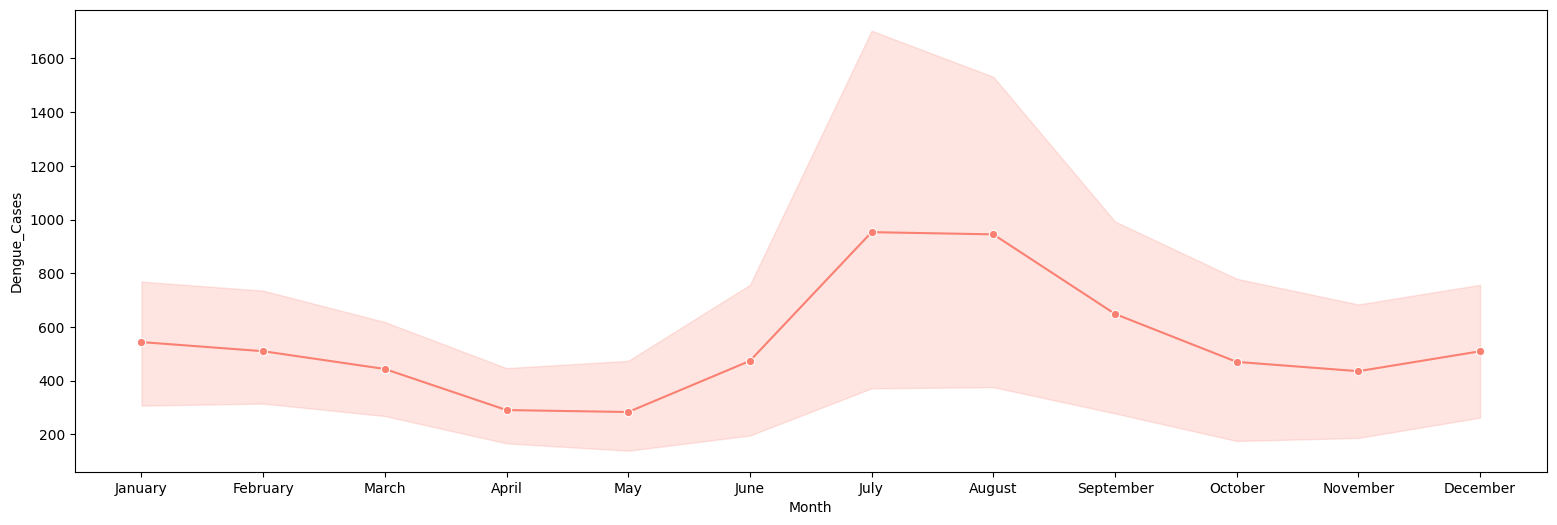

In [101]:
regionXI  = dengue[dengue['Region'] == 'Region XI']
sns.lineplot(data = regionXI, x='Month', y='Dengue_Cases', marker='o', color='salmon')
plt.gcf().set_size_inches(19, 6)
plt.show()

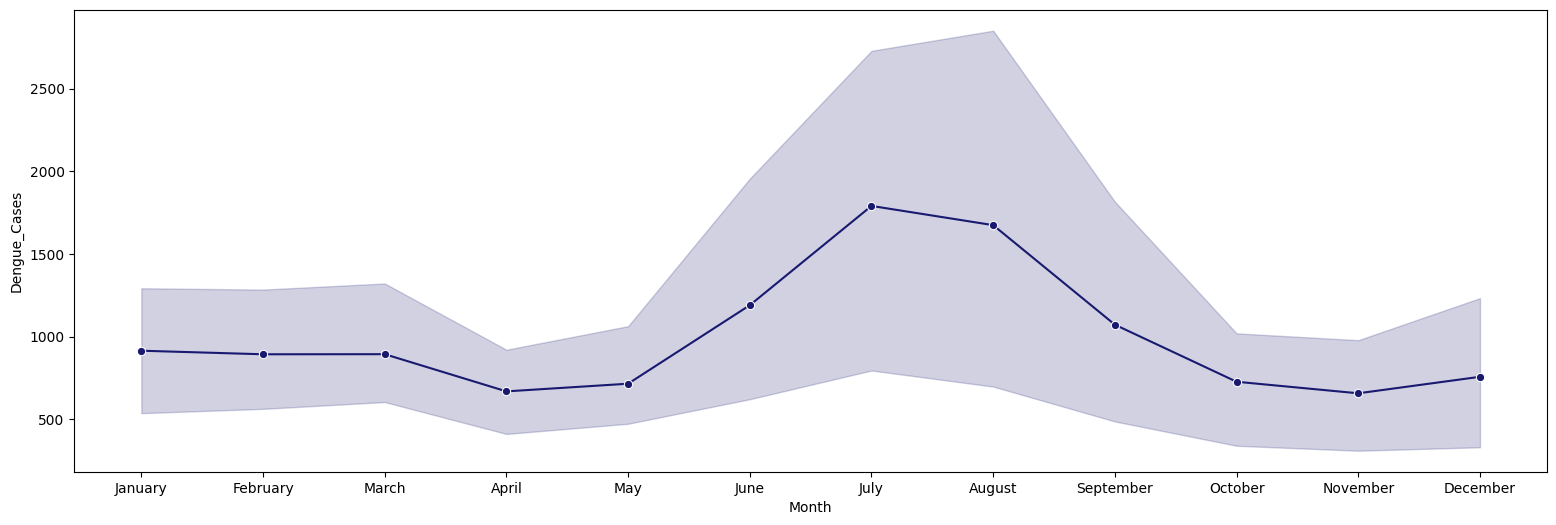

In [99]:
regionXII  = dengue[dengue['Region'] == 'Region XII']
sns.lineplot(data = regionXII, x='Month', y='Dengue_Cases', marker='o', color='midnightblue')
plt.gcf().set_size_inches(19, 6)
plt.show()

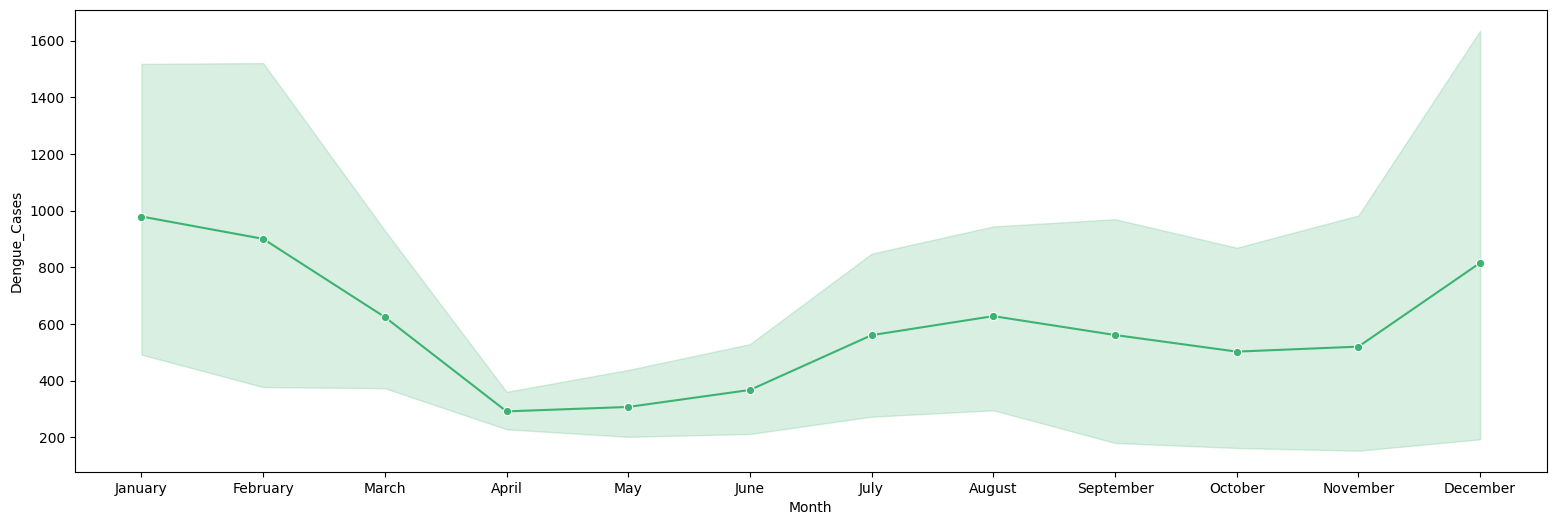

In [100]:
regionXIII  = dengue[dengue['Region'] == 'Region XIII']
sns.lineplot(data = regionXIII, x='Month', y='Dengue_Cases', marker='o', color='mediumseagreen')
plt.gcf().set_size_inches(19, 6)
plt.show()